# QuickGuide for marketmodels

[프로젝트 페이지: Research-on-the-TV-market](https://github.com/xikest/research-market-tv)

## Env setting: Install Colab selenium & crome driver

In [ ]:
!pip install -U pandas openpyxl tqdm --q
!pip install -U requests selenium beautifulsoup4 --q
!pip install -U matplotlib seaborn --q
!pip install -U mkt-retv --q

In [2]:
from market_research.tools.installer import Installer
Installer.install_chrome_and_driver()

## Env. 세팅

In [1]:
from market_research.scraper import Specscraper_s, Specscraper_sjp
from market_research.scraper import Specscraper_p, Specscraper_pjp
from market_research.scraper import Visualizer_s

## 실행

### sonyspec

In [18]:
scraper_s = Specscraper_s(export_prefix="sony_model_info_web")
df_s_models = scraper_s.get_models_info()

#### Plot

In [31]:
visualizer_s = Visualizer_s(df_s_models)

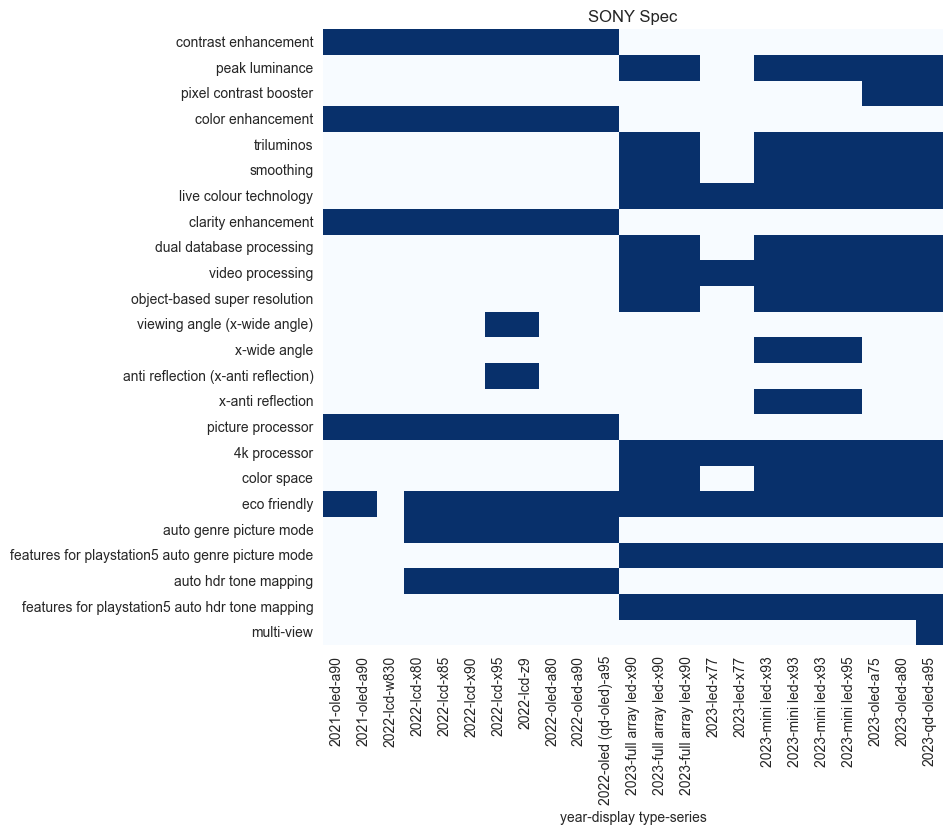

In [32]:
visualizer_s.heatmap_spec(display_types=['oled','lcd', 'led', 'mini led'])

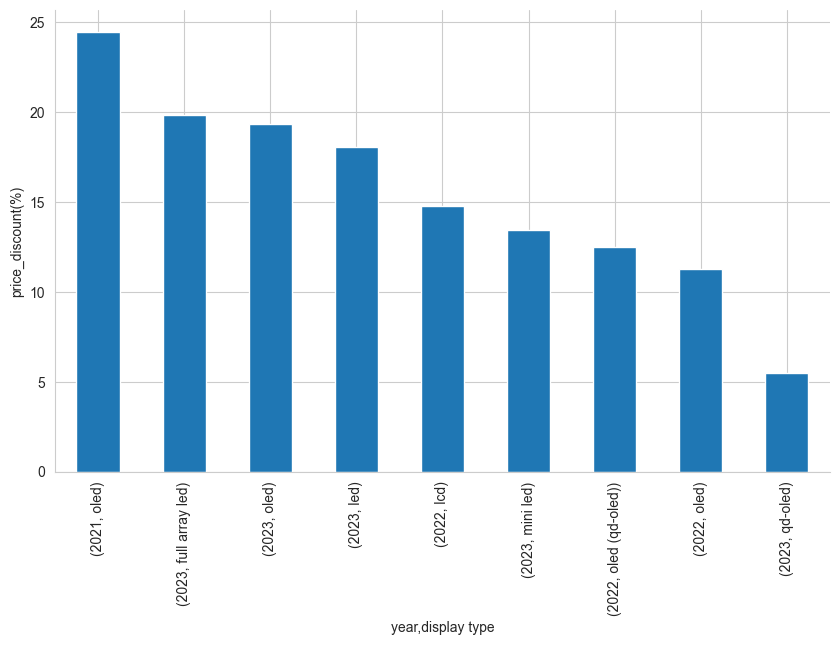

In [11]:
visualizer_s.group_plot_bar(col_group = ["year", "display type"])

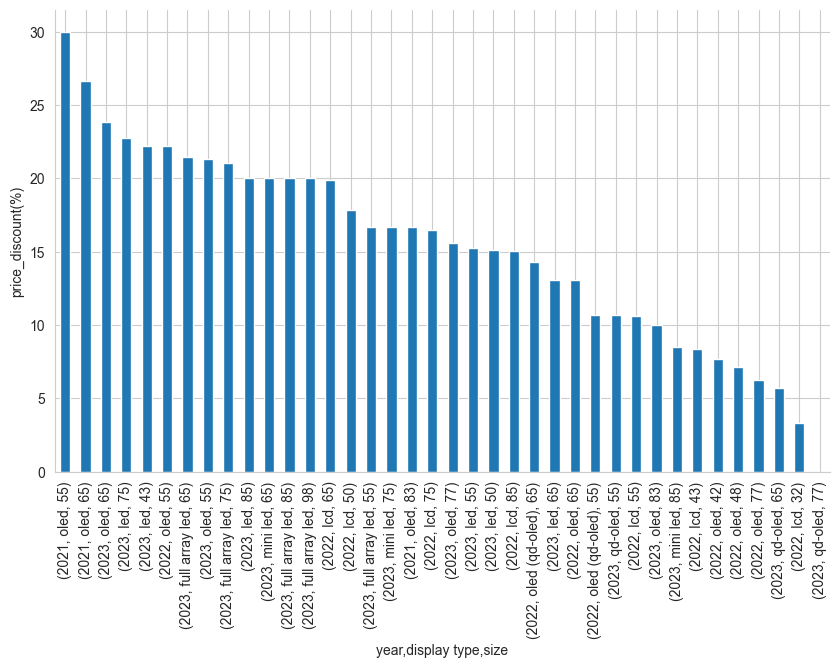

In [12]:
visualizer_s.group_plot_bar(col_group =["year","display type", "size"])

### sonyspec_jp

In [ ]:
scraper_sjp = Specscraper_sjp(export_prefix="sony_model_info_web_jp")
df_sjp_models = scraper_sjp.get_models_info()

### panasonicspec

In [ ]:
scraper_p = Specscraper_p(export_prefix="pana_model_info_web")
df_p_models = scraper_p.get_models_info()

### panasonicspec_jp

In [8]:
scraper_pjp = Specscraper_pjp(export_prefix="pana_model_info_web_jp")
df_pjp_models = scraper_pjp.get_models_info()

## colab에서 파일 받기

In [ ]:
from google.colab import files
!zip -r /content/results.zip /content/results
files.download('/content/results.zip')

---